<a href="https://colab.research.google.com/github/Rakshithadhandre/Machine_Learning_Models/blob/main/Malaria_outbreak_detection_using_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/outbreak_detect.csv")

In [3]:
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
3,NaN,24.0,84.57,11.15,9693,482,No
4,34.0,24.0,59.16,9.06,4198,211,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   maxTemp      24 non-null     float64
 1   minTemp      25 non-null     float64
 2   avgHumidity  26 non-null     float64
 3   Rainfall     26 non-null     float64
 4   Positive     26 non-null     int64  
 5   pf           26 non-null     int64  
 6   Outbreak     25 non-null     object 
dtypes: float64(4), int64(2), object(1)
memory usage: 1.5+ KB


In [5]:
df.describe()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf
count,24.000000,25.000000,26.000000,26.000000,26.000000,26.000000
mean,33.458333,23.960000,69.611538,7.035769,7951.307692,412.346154
std,8.203812,2.805946,15.378182,9.233042,3617.947006,217.488564
min,1.000000,18.000000,34.740000,0.000000,416.000000,26.000000
25%,31.000000,23.000000,57.915000,0.095000,5487.500000,213.000000
50%,33.500000,24.000000,73.290000,4.095000,9271.500000,414.000000
75%,36.750000,24.000000,84.245000,11.150000,10702.500000,532.250000
max,45.000000,32.000000,88.770000,41.400000,13154.000000,838.000000


In [6]:
df.shape

(26, 7)

In [9]:
df.isna().head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [10]:
df.isna().sum() #calculate the sum() of missing values

maxTemp        2
minTemp        1
avgHumidity    0
Rainfall       0
Positive       0
pf             0
Outbreak       1
dtype: int64

In [11]:
df.fillna(df.mean()) #imputing missing data with mean values can only be done with numerical data.

<ipython-input-11-a2478f315f9e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean())


,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.000000,18.00,49.74,0.00,2156,112,No
1,34.000000,23.00,83.27,15.22,10717,677,Yes
2,40.000000,23.00,50.74,0.00,1257,127,No
3,33.458333,24.00,84.57,11.15,9693,482,No
4,34.000000,24.00,59.16,9.06,4198,211,No
5,34.000000,27.00,73.23,0.00,11808,712,Yes
6,31.000000,24.00,88.77,41.40,10881,648,Yes
7,33.000000,24.00,77.94,23.88,8830,459,Yes
8,31.000000,24.00,84.57,11.15,9693,482,No
9,36.000000,24.00,53.40,2.12,9310,549,No


In [14]:
#replacing the values of column with the median of values-less no. of records in dataset
#accesing the col value
median_maxTemp=df['maxTemp'].median()

In [15]:
median_maxTemp

33.5

In [19]:
median_minTemp=df['minTemp'].median()
print(median_minTemp)

24.0


In [21]:
import math
median_minTemp=math.floor(df['minTemp'].median())
median_maxTemp=math.floor(df['maxTemp'].median())
print(median_minTemp)
print(median_maxTemp)

24
33


In [22]:
#replacing NaN values
df['maxTemp']=df['maxTemp'].fillna(median_minTemp)
df['minTemp']=df['minTemp'].fillna(median_minTemp)

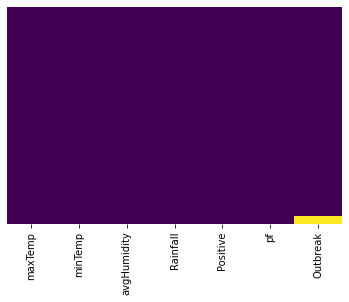

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  return plt.show()
get_heatmap(df)

In [26]:
df.head(30)

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
3,24.0,24.0,84.57,11.15,9693,482,No
4,34.0,24.0,59.16,9.06,4198,211,No
5,34.0,27.0,73.23,0.00,11808,712,Yes
6,31.0,24.0,88.77,41.40,10881,648,Yes
7,33.0,24.0,77.94,23.88,8830,459,Yes
8,31.0,24.0,84.57,11.15,9693,482,No
9,36.0,24.0,53.40,2.12,9310,549,No


**Data Preprocessing**

In [69]:
#data preprocessing
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()
#fitting the technique to dataset 
df.Outbreak=LE.fit_transform(df.Outbreak)#converting variables to numeric values

In [28]:
df.head(26)

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,0
1,34.0,23.0,83.27,15.22,10717,677,1
2,40.0,23.0,50.74,0.00,1257,127,0
3,24.0,24.0,84.57,11.15,9693,482,0
4,34.0,24.0,59.16,9.06,4198,211,0
5,34.0,27.0,73.23,0.00,11808,712,1
6,31.0,24.0,88.77,41.40,10881,648,1
7,33.0,24.0,77.94,23.88,8830,459,1
8,31.0,24.0,84.57,11.15,9693,482,0
9,36.0,24.0,53.40,2.12,9310,549,0


In [29]:
median_Outbreak=df['Outbreak'].median()
print(median_Outbreak)

0.0


In [31]:
df['Outbreak']=df['Outbreak'].replace(2,0)
print(df)   

    maxTemp  minTemp  avgHumidity  Rainfall  Positive   pf  Outbreak
0      29.0     18.0        49.74      0.00      2156  112         0
1      34.0     23.0        83.27     15.22     10717  677         1
2      40.0     23.0        50.74      0.00      1257  127         0
3      24.0     24.0        84.57     11.15      9693  482         0
4      34.0     24.0        59.16      9.06      4198  211         0
5      34.0     27.0        73.23      0.00     11808  712         1
6      31.0     24.0        88.77     41.40     10881  648         1
7      33.0     24.0        77.94     23.88      8830  459         1
8      31.0     24.0        84.57     11.15      9693  482         0
9      36.0     24.0        53.40      2.12      9310  549         0
10     32.0     23.0        57.50      0.00     13154  838         1
11     34.0     18.0        59.40      0.00      2197  136         0
12     42.0     24.0        49.43      2.19      3362  213         0
13     45.0     32.0        34.74 

In [32]:
df=df.drop(['Positive','pf'],axis=1)

In [33]:
df

,maxTemp,minTemp,avgHumidity,Rainfall,Outbreak
0,29.0,18.0,49.74,0.00,0
1,34.0,23.0,83.27,15.22,1
2,40.0,23.0,50.74,0.00,0
3,24.0,24.0,84.57,11.15,0
4,34.0,24.0,59.16,9.06,0
5,34.0,27.0,73.23,0.00,1
6,31.0,24.0,88.77,41.40,1
7,33.0,24.0,77.94,23.88,1
8,31.0,24.0,84.57,11.15,0
9,36.0,24.0,53.40,2.12,0


***Visualization***

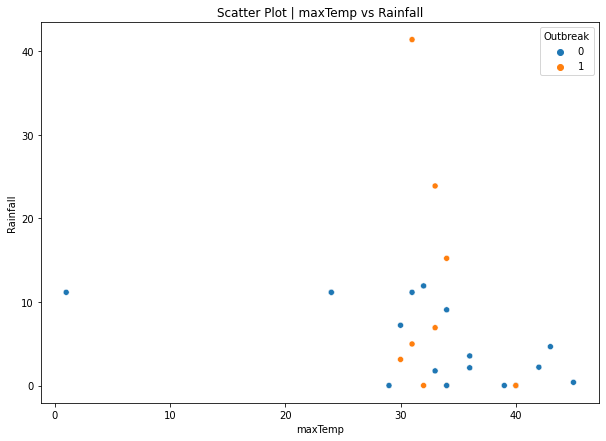

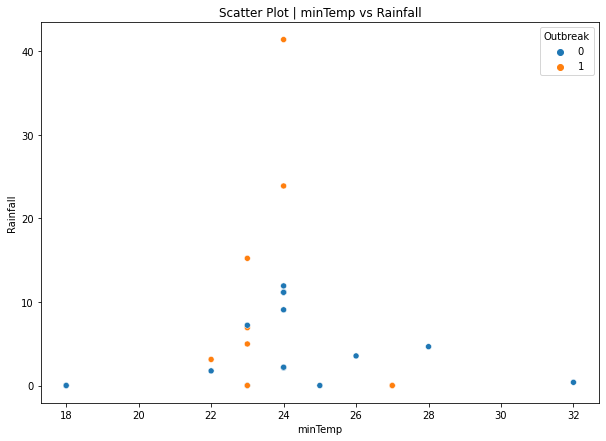

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_vs(frame,col1,col2,hue):
  plt.figure(figsize=(10,7))
  sns.scatterplot(data=frame,x=col1,y=col2,hue=hue)
  plt.title(f"Scatter Plot | {col1} vs {col2}")
plot_vs(df,'maxTemp','Rainfall','Outbreak')
plot_vs(df,'minTemp','Rainfall','Outbreak')

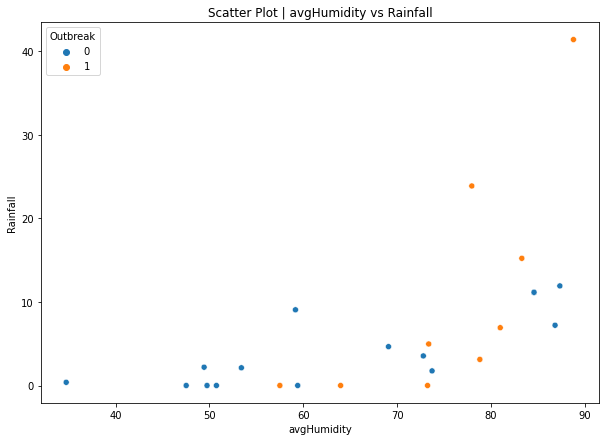

In [75]:
plot_vs(df,'avgHumidity','Rainfall','Outbreak')

**Loading the Data**


In [34]:
#splitting the data
X=df.iloc[:,:-1]
Y=df.iloc[:,-1:]

In [35]:
X

,maxTemp,minTemp,avgHumidity,Rainfall
0,29.0,18.0,49.74,0.00
1,34.0,23.0,83.27,15.22
2,40.0,23.0,50.74,0.00
3,24.0,24.0,84.57,11.15
4,34.0,24.0,59.16,9.06
5,34.0,27.0,73.23,0.00
6,31.0,24.0,88.77,41.40
7,33.0,24.0,77.94,23.88
8,31.0,24.0,84.57,11.15
9,36.0,24.0,53.40,2.12


In [36]:
Y

,Outbreak
0,0
1,1
2,0
3,0
4,0
5,1
6,1
7,1
8,0
9,0


**Splitting of data**

In [37]:
#splitting the data set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [38]:
X_train

,maxTemp,minTemp,avgHumidity,Rainfall
22,30.0,23.0,86.81,7.21
13,45.0,32.0,34.74,0.38
18,24.0,24.0,84.57,11.15
19,39.0,25.0,47.52,0.00
16,32.0,24.0,87.32,11.92
1,34.0,23.0,83.27,15.22
10,32.0,23.0,57.50,0.00
25,1.0,24.0,84.57,11.15
24,33.0,22.0,73.71,1.75
8,31.0,24.0,84.57,11.15


In [40]:
X_test

,maxTemp,minTemp,avgHumidity,Rainfall
2,40.0,23.0,50.74,0.00
20,36.0,26.0,72.78,3.54
14,43.0,28.0,69.07,4.65
17,40.0,27.0,63.97,0.00
5,34.0,27.0,73.23,0.00
11,34.0,18.0,59.40,0.00


In [48]:
#Normalizing the data-standard scalar
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(X_train)#normalization
X_test=sst.transform(X_test)

**Build the Model-LOGISTIC REGRESSION**

In [51]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

***Training*** the Model

In [52]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

***Testing*** the model

In [54]:
y_pred=model.predict(X_test)

In [55]:
model.score(sst.transform(X),Y)

0.7692307692307693

In [56]:
model.score(X_train,Y_train)

0.8

In [64]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, model.predict(X_test)))#calculate the accuracy of our trained modelS

0.6666666666666666


In [67]:
model.score(X_train,Y_train)

0.8

In [68]:
model.score(X_test,Y_test)

0.6666666666666666